IMPORTING DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
dframe1=pd.read_csv('/content/fraudTest.csv')
dframe2=pd.read_csv('/content/fraudTrain.csv')

In [ ]:
dframe3=pd.concat([dframe1, dframe2], ignore_index=True)

COMBINED DATAFRAME

In [ ]:
dframe3.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
dframe3.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1852390,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1852391,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1852392,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1852393,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


FULL DATAFRAME

In [ ]:
dframe3

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1852390,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1852391,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1852392,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


CHECKING FOR MISSING VALUES

In [ ]:
dframe3.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#number of rows and columns
dframe3.shape

(1852394, 23)

TARGET FEATURE

In [ ]:
dframe3['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

THE DATASET IS IMBALANCED

legit value == 0
fraud value == 1


In [ ]:
legit=dframe3[dframe3.is_fraud==0]
fraud=dframe3[dframe3.is_fraud==1]

In [ ]:
legit.amt.describe()

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [ ]:
fraud.amt.describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

In [ ]:
dframe3.drop(['merchant','first','last','gender','street','city','state','lat','long','dob','merch_lat','merch_long'],axis=1,inplace=True)

In [ ]:
labels=LabelEncoder()
labels1=labels.fit_transform(dframe3.trans_date_trans_time)
dframe3['trans_date_trans_time']=labels1
labels2=labels.fit_transform(dframe3.category)
dframe3['category']=labels2
labels3=labels.fit_transform(dframe3.job)
dframe3['job']=labels3
labels4=labels.fit_transform(dframe3.trans_num)
dframe3['trans_num']=labels4
dframe3

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,zip,city_pop,job,trans_num,unix_time,is_fraud
0,0,1274791,2291163933867244,10,2.86,29209,333497,288,329864,1371816865,0
1,1,1274792,3573030041201292,10,29.84,84002,302,406,363509,1371816873,0
2,2,1274793,3598215285024754,5,41.28,11710,34496,272,1447341,1371816893,0
3,3,1274794,3591919803438423,9,60.05,32780,54767,422,240955,1371816915,0
4,4,1274795,3526826139003047,13,3.19,49632,1126,205,636661,1371816917,0
...,...,...,...,...,...,...,...,...,...,...,...
1852389,1296670,1274786,30263540414123,0,15.56,84735,258,216,492241,1371816728,0
1852390,1296671,1274787,6011149206456997,1,51.70,21790,100,362,285107,1371816739,0
1852391,1296672,1274788,3514865930894695,1,105.93,88325,899,309,522540,1371816752,0
1852392,1296673,1274789,2720012583106919,1,74.90,57756,1126,488,1551366,1371816816,0


In [ ]:
dframe3

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,zip,city_pop,job,trans_num,unix_time,is_fraud
0,0,1274791,2291163933867244,10,2.86,29209,333497,288,329864,1371816865,0
1,1,1274792,3573030041201292,10,29.84,84002,302,406,363509,1371816873,0
2,2,1274793,3598215285024754,5,41.28,11710,34496,272,1447341,1371816893,0
3,3,1274794,3591919803438423,9,60.05,32780,54767,422,240955,1371816915,0
4,4,1274795,3526826139003047,13,3.19,49632,1126,205,636661,1371816917,0
...,...,...,...,...,...,...,...,...,...,...,...
1852389,1296670,1274786,30263540414123,0,15.56,84735,258,216,492241,1371816728,0
1852390,1296671,1274787,6011149206456997,1,51.70,21790,100,362,285107,1371816739,0
1852391,1296672,1274788,3514865930894695,1,105.93,88325,899,309,522540,1371816752,0
1852392,1296673,1274789,2720012583106919,1,74.90,57756,1126,488,1551366,1371816816,0


COMPARING AND VERIFYING

In [ ]:
dframe3.groupby('is_fraud').mean()

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,zip,city_pop,job,trans_num,unix_time
is_fraud,,,,,,,,,,
0,537179.530738,911229.785545,4.174926e+17,6.225109,67.651278,48817.519363,88636.579284,252.313421,926202.112635,1.358692e+09
1,539849.247228,814279.261527,3.970393e+17,7.273029,530.661412,47999.638379,89998.422961,249.594343,925124.834421,1.355323e+09


SAMPLE DATASET

no of frauds=9651
no of legit=1842743

In [ ]:
legitdata=legit.sample(n=9651)

In [ ]:
dframe=pd.concat([legitdata,fraud],axis=0)

In [ ]:
dframe['is_fraud'].value_counts()

0    9651
1    9651
Name: is_fraud, dtype: int64

VERIFICATION

In [ ]:
dframe.groupby('is_fraud').mean()

<ipython-input-21-1c59551fa7d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dframe.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,535149.626982,4.085766e+17,67.623612,48769.984976,38.619939,-90.269168,85789.229821,1.358972e+09,38.636457,-90.278315
1,539849.247228,3.970393e+17,530.661412,47999.638379,38.742813,-90.033730,89998.422961,1.355323e+09,38.734962,-90.037919


In [ ]:
dframe.drop(['merchant','first','last','gender','street','city','state','lat','long','dob','merch_lat','merch_long'],axis=1,inplace=True)

In [ ]:
Labels=LabelEncoder()
Labels1=Labels.fit_transform(dframe.trans_date_trans_time)
dframe['trans_date_trans_time']=Labels1
Labels2=Labels.fit_transform(dframe.category)
dframe['category']=Labels2
Labels3=labels.fit_transform(dframe.job)
dframe['job']=Labels3
Labels4=labels.fit_transform(dframe.trans_num)
dframe['trans_num']=Labels4
dframe

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,zip,city_pop,job,trans_num,unix_time,is_fraud
1157270,601551,6651,581686439828,1,5.85,16314,5507,402,9824,1347482818,0
181264,181264,15905,4538566639857,4,61.01,7022,13835,368,18755,1377309387,0
525546,525546,19121,3501942333500073,9,451.86,85086,1312922,112,1006,1387974276,0
501661,501661,18969,4952583804639909,12,3.15,44483,75903,278,12081,1387534670,0
515389,515389,19065,3533800906065217,13,3.34,68932,493,443,12119,1387728240,0
...,...,...,...,...,...,...,...,...,...,...,...
1851118,1295399,14164,3524574586339330,11,977.01,32960,105638,272,12636,1371776408,1
1851210,1295491,14165,3524574586339330,11,1210.91,32960,105638,272,18679,1371779615,1
1851251,1295532,14166,4005676619255478,2,10.24,70726,71335,223,12080,1371781016,1
1851385,1295666,14168,3560725013359375,2,21.69,79759,23,115,16443,1371785180,1


In [ ]:
x=dframe.drop(columns='is_fraud',axis=1)
y=dframe['is_fraud']
x

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,zip,city_pop,job,trans_num,unix_time
1157270,601551,6651,581686439828,1,5.85,16314,5507,402,9824,1347482818
181264,181264,15905,4538566639857,4,61.01,7022,13835,368,18755,1377309387
525546,525546,19121,3501942333500073,9,451.86,85086,1312922,112,1006,1387974276
501661,501661,18969,4952583804639909,12,3.15,44483,75903,278,12081,1387534670
515389,515389,19065,3533800906065217,13,3.34,68932,493,443,12119,1387728240
...,...,...,...,...,...,...,...,...,...,...
1851118,1295399,14164,3524574586339330,11,977.01,32960,105638,272,12636,1371776408
1851210,1295491,14165,3524574586339330,11,1210.91,32960,105638,272,18679,1371779615
1851251,1295532,14166,4005676619255478,2,10.24,70726,71335,223,12080,1371781016
1851385,1295666,14168,3560725013359375,2,21.69,79759,23,115,16443,1371785180


In [ ]:
y

1157270    0
181264     0
525546     0
501661     0
515389     0
          ..
1851118    1
1851210    1
1851251    1
1851385    1
1851452    1
Name: is_fraud, Length: 19302, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify =y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(19302, 10) (15441, 10) (3861, 10)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[ 1.71027997,  0.58895851, -0.3133799 , ...,  1.2362713 ,
         1.59421383,  0.60883922],
       [ 0.09973219, -0.59290872, -0.31609077, ..., -0.95818249,
         1.11950904, -0.58594464],
       [ 1.14908171,  0.15920491, -0.31336777, ...,  1.41210894,
         1.09421298,  0.12512131],
       ...,
       [-0.12113408, -0.74637935, -0.31335596, ..., -1.18325467,
         1.2255372 , -0.72572301],
       [-0.84974478, -1.22543718, -0.31609438, ...,  1.18000325,
        -0.52258204, -1.22655003],
       [-1.32159031, -1.63779984, -0.31607091, ...,  1.15890274,
        -1.52886291, -1.64871822]])

In [ ]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-4.60728725e-01,  1.47771731e+00, -2.96540632e-01, ...,
        -1.60207561e+00,  3.59476437e-02,  1.49217252e+00],
       [-1.76975432e-01, -7.74494298e-01, -2.94172968e-01, ...,
         1.35306835e-01, -1.25296119e+00, -7.58814875e-01],
       [ 1.02356322e+00,  6.38359314e-02,  3.53932482e+00, ...,
        -5.93272898e-01,  7.04044339e-01,  1.79524636e-03],
       ...,
       [ 6.06946492e-01, -2.05079470e-01, -2.95456989e-01, ...,
         6.04680317e-01,  1.08933261e+00, -1.82200727e-01],
       [-1.24946620e+00, -1.54712976e+00, -2.99408572e-01, ...,
         1.58546073e+00, -7.73195571e-02, -1.55582560e+00],
       [ 4.71385603e-01, -2.92070896e-01, -2.99433182e-01, ...,
         8.07841974e-01, -2.26364810e-01, -2.89407644e-01]])

LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred1=model.predict(x_test)
accuracy_score(y_test,pred1)

0.8565138565138565

In [ ]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [ ]:
pred2=svm.predict(x_train)
accuracy_score(pred2,y_train)

0.8649698853701185

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred3=RF.predict(x_test)
accuracy_score(y_test,pred3)

0.8995078995078996

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
pred4=GBC.predict(x_test)
accuracy_score(y_test,pred4)

0.8901838901838902

In [ ]:
print("LOGISTIC REGRESSION",accuracy_score(y_test,pred1))
print("SVC",accuracy_score(pred2,y_train))
print("RANDOM FOREST",accuracy_score(y_test,pred3))
print("GRADIENT CLASSIFICATION",accuracy_score(y_test,pred4))

LOGISTIC REGRESSION 0.8565138565138565
SVC 0.8649698853701185
RANDOM FOREST 0.8995078995078996
GRADIENT CLASSIFICATION 0.8901838901838902


<Axes: xlabel='amt', ylabel='category'>

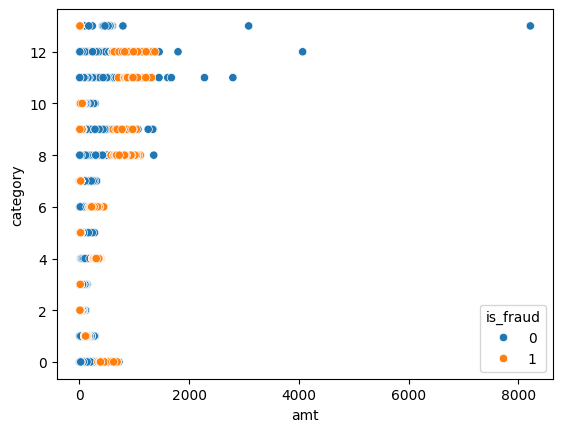

In [ ]:
import seaborn as sns
sns.scatterplot(x='amt',y='category',hue='is_fraud',data=dframe)

<Axes: xlabel='is_fraud', ylabel='count'>

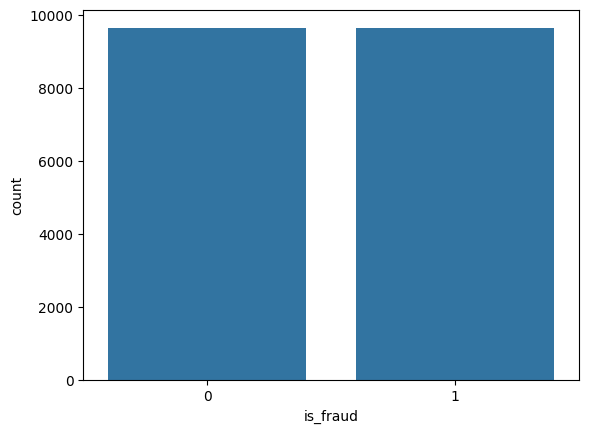

In [ ]:
sns.countplot(x='is_fraud',data=dframe)